# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

In [2]:
#Importing important Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
CCA=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
CCA.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Dataset Description
Problem Statement: Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

Examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

Feature Columns:
1 gender

2 SeniorCitizen

3 Partner

4 Dependents

5 tenure

6 PhoneService

7 MultipleLines

8 InternetService

9 OnlineSecurity

10 OnlineBackup

11 DeviceProtection

12 TechSupport

13 StreamingTV

14 StreamingMovies

15 Contract

16 PaperlessBilling

17 PaymentMethod

18 MonthlyCharges

19 TotalCharges

Target/Label Column:
Churn

In [5]:
CCA.shape

(7043, 21)

In [6]:
CCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
CCA.nunique() #unique elements in each column

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
#checking for null values
CCA.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

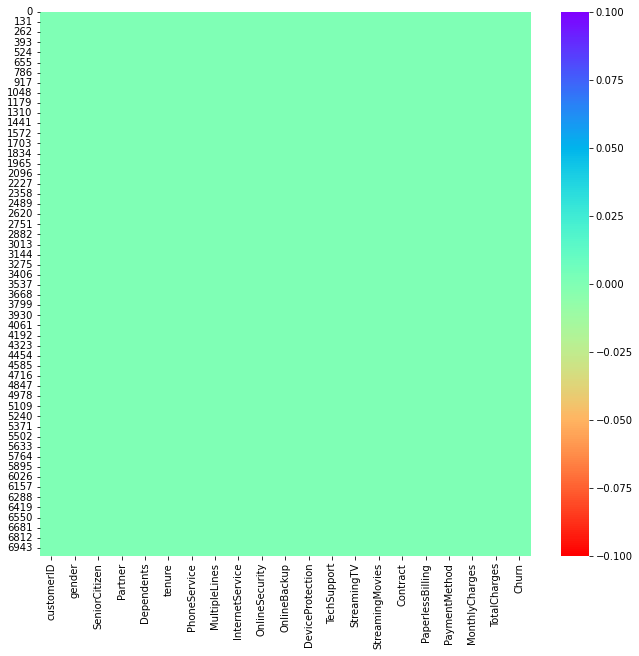

In [9]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(CCA.isna(), cmap='rainbow_r')

In [10]:
#Checking for blank spaces, random characters in each column
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for A in CCA:
    for B in search:
        print(f"{A} in {B} = ",end= " ")
        print((CCA[A] == B).sum())

customerID in   =  0
customerID in ? =  0
customerID in - =  0
customerID in  ? =  0
customerID in  - =  0
customerID in ?  =  0
customerID in -  =  0
customerID in  ?  =  0
customerID in  -  =  0
customerID in NA =  0
customerID in N/A =  0
customerID in  NA =  0
customerID in  N/A =  0
gender in   =  0
gender in ? =  0
gender in - =  0
gender in  ? =  0
gender in  - =  0
gender in ?  =  0
gender in -  =  0
gender in  ?  =  0
gender in  -  =  0
gender in NA =  0
gender in N/A =  0
gender in  NA =  0
gender in  N/A =  0
SeniorCitizen in   =  0
SeniorCitizen in ? =  0
SeniorCitizen in - =  0
SeniorCitizen in  ? =  0
SeniorCitizen in  - =  0
SeniorCitizen in ?  =  0
SeniorCitizen in -  =  0
SeniorCitizen in  ?  =  0
SeniorCitizen in  -  =  0
SeniorCitizen in NA =  0
SeniorCitizen in N/A =  0
SeniorCitizen in  NA =  0
SeniorCitizen in  N/A =  0
Partner in   =  0
Partner in ? =  0
Partner in - =  0
Partner in  ? =  0
Partner in  - =  0
Partner in ?  =  0
Partner in -  =  0
Partner in  ?  =

# TotalCharges has 11 blank space values, which are null values.

In [11]:
(CCA=='?').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
CCA['TotalCharges'] = CCA['TotalCharges'].replace(" ",np.nan) #converting blank values to null values

In [13]:
CCA.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
CCA['TotalCharges']= CCA['TotalCharges'].astype(float)

# Getting the basic summary and statistical information of the data.

In [15]:
CCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
CCA.dtypes[CCA.dtypes == 'object'] #Identifying the Categorical Columns

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [17]:
CCA.dtypes[CCA.dtypes != 'object']#Identifying the Continuous/discrete Columns

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [18]:
CCA.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:>

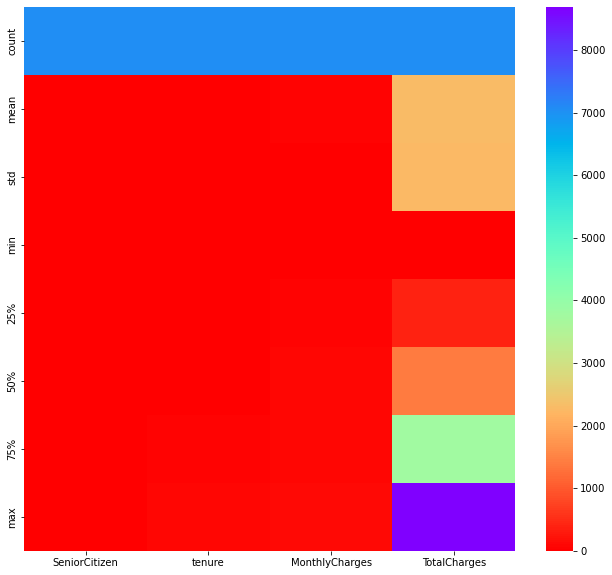

In [19]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(CCA.describe(), cmap='rainbow_r')

In [20]:
#Using KNN Imputation technique for imputing missing data.
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
CCA[['TotalCharges']] = imp.fit_transform(CCA[['TotalCharges']])
CCA.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
#Dropping column customerID since it doesn't contribute to building a good model for predicting the target variable values.
CCA.drop(columns='customerID',inplace=True)
CCA.shape

(7043, 20)

# EDA

In [22]:
#Analyzing the Target Class
CCA.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [23]:
CCA['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

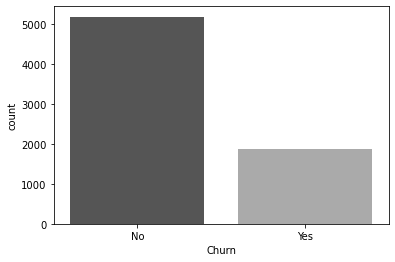

In [24]:
sns.countplot(CCA['Churn'], palette="binary_r")

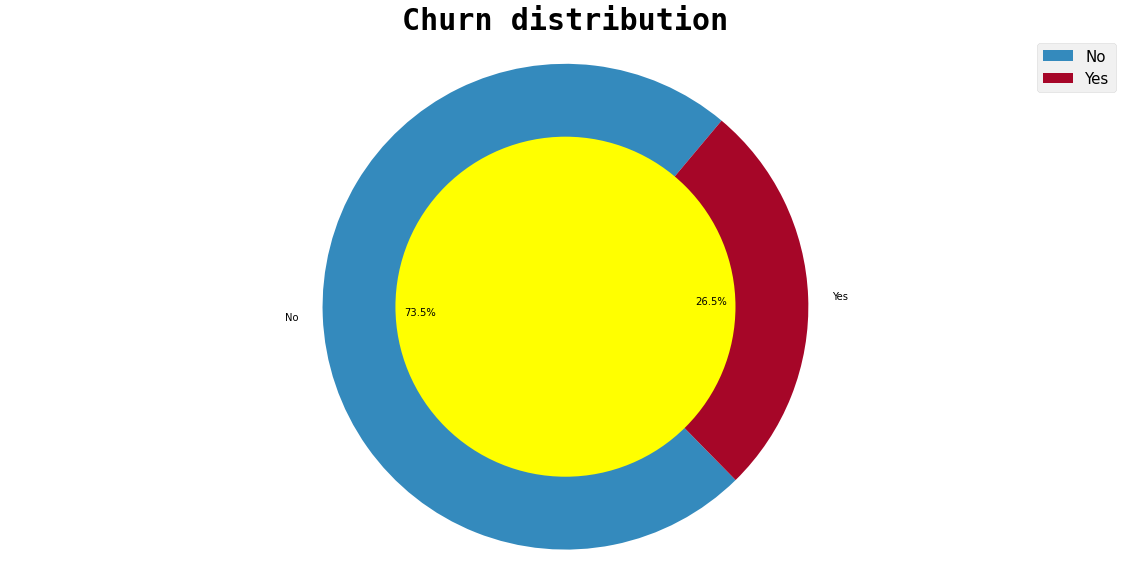

In [25]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for ['Churn']
relation = CCA['Churn'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='yellow')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [26]:
#Analyzing Feature column Catergorical Classes
CCA.dtypes[CCA.dtypes == 'object'] #Identifying the Categorical Columns

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [27]:
CCA['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

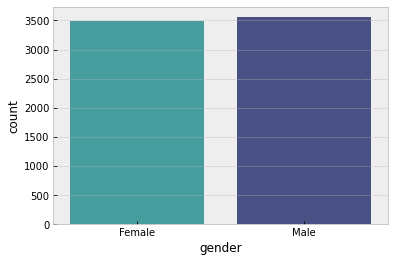

In [28]:
sns.countplot(CCA['gender'], palette="mako_r")

In [29]:
CCA['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

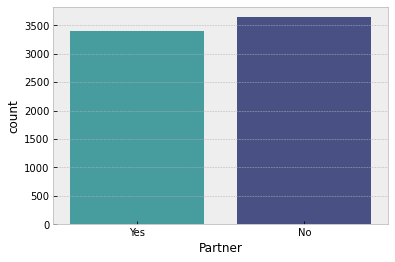

In [30]:
sns.countplot(CCA['Partner'], palette="mako_r")

In [31]:
CCA['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

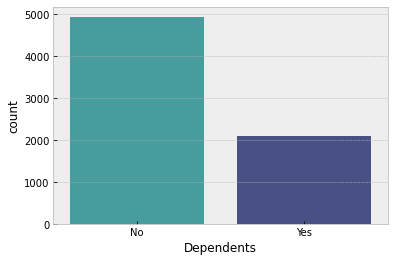

In [32]:
sns.countplot(CCA['Dependents'], palette="mako_r")

In [33]:
CCA['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

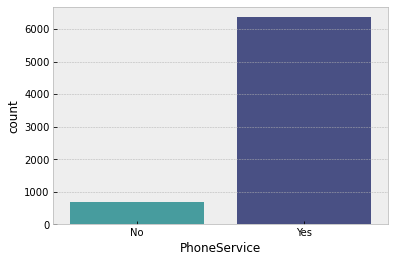

In [34]:
sns.countplot(CCA['PhoneService'], palette="mako_r")

In [35]:
CCA['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

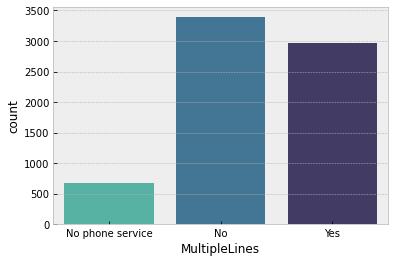

In [36]:
sns.countplot(CCA['MultipleLines'], palette="mako_r")

In [37]:
CCA['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

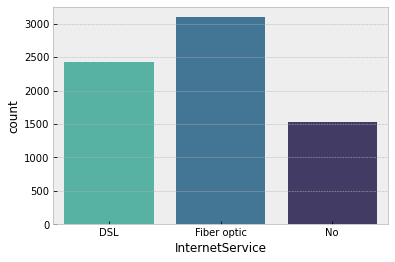

In [38]:
sns.countplot(CCA['InternetService'], palette="mako_r")

In [39]:
CCA['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

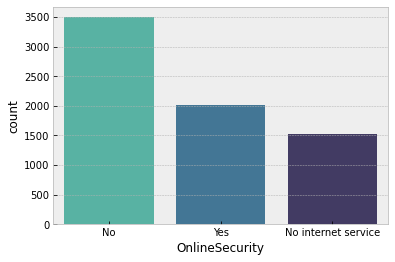

In [40]:
sns.countplot(CCA['OnlineSecurity'], palette="mako_r")

In [41]:
CCA['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

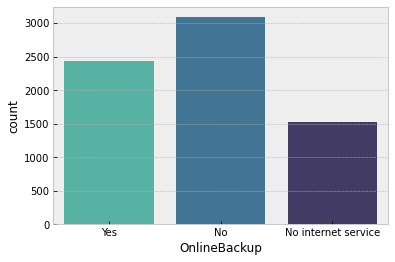

In [42]:
sns.countplot(CCA['OnlineBackup'], palette="mako_r")

In [43]:
CCA['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

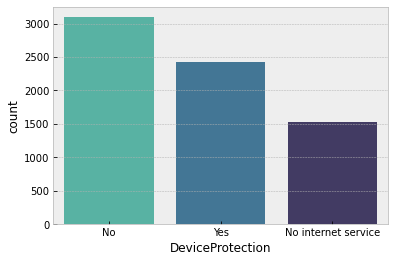

In [44]:
sns.countplot(CCA['DeviceProtection'], palette="mako_r")

In [45]:
CCA['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

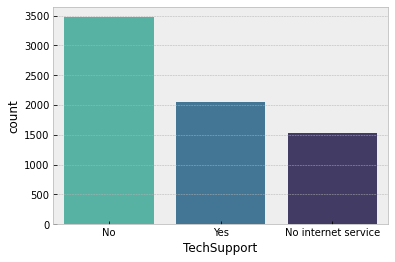

In [46]:
sns.countplot(CCA['TechSupport'], palette="mako_r")

In [47]:
CCA['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

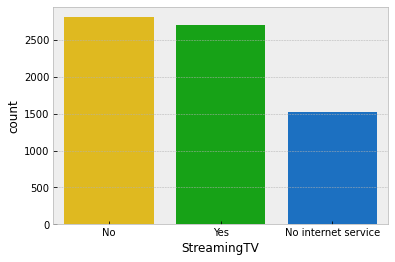

In [48]:
sns.countplot(CCA['StreamingTV'], palette="nipy_spectral_r")

In [49]:
CCA['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

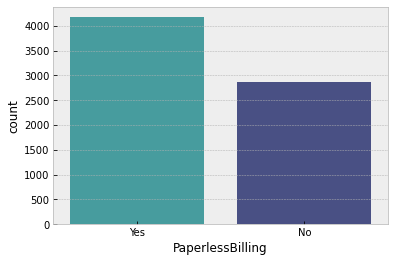

In [50]:
sns.countplot(CCA['PaperlessBilling'], palette="mako_r")

In [51]:
CCA['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

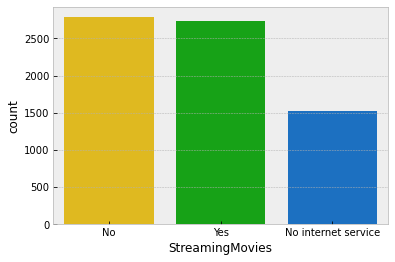

In [52]:
sns.countplot(CCA['StreamingMovies'], palette="nipy_spectral_r")

In [53]:
CCA['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

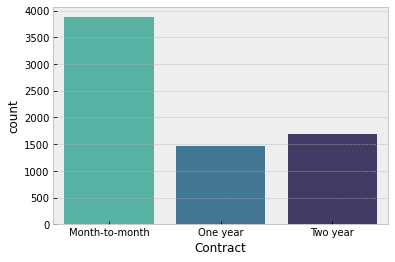

In [54]:
sns.countplot(CCA['Contract'], palette="mako_r")

In [55]:
CCA['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

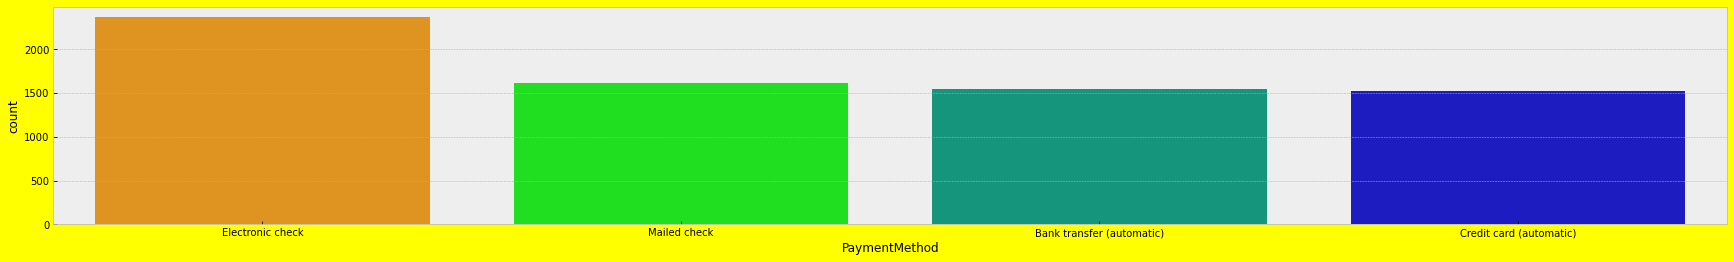

In [56]:
plt.figure(figsize=(30,4),facecolor='yellow')
sns.countplot(CCA['PaymentMethod'], palette="nipy_spectral_r")

In [57]:
#Analyzing Feature columns with Continuous Data.
CCA.dtypes[CCA.dtypes != 'object']#Identifying the Continuous/discrete Columns

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

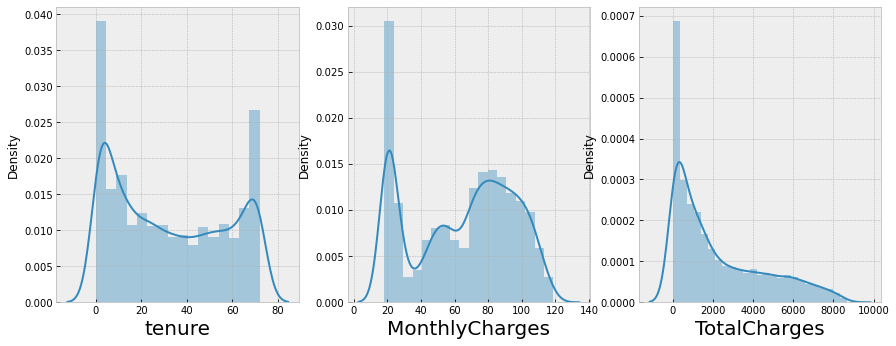

In [58]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in CCA[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(CCA[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [59]:
CCA[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

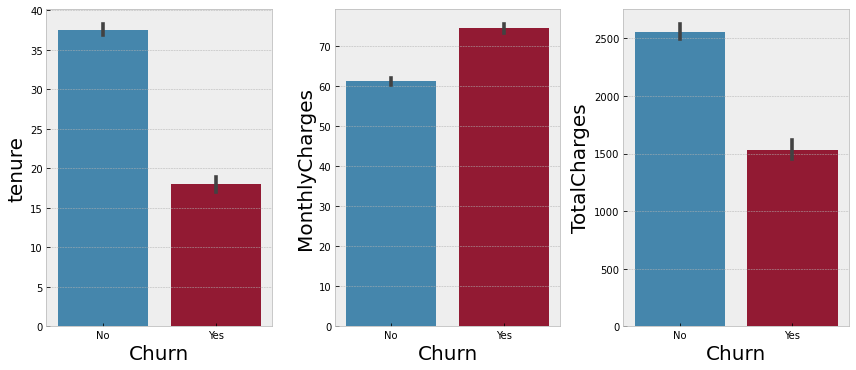

In [60]:
#Interpreting Relationship between Dependent Variable and Independent Variables
#'Churn' vs Continuous/Discrete Data Columns
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = CCA['Churn']
X = CCA[['tenure','MonthlyCharges','TotalCharges']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

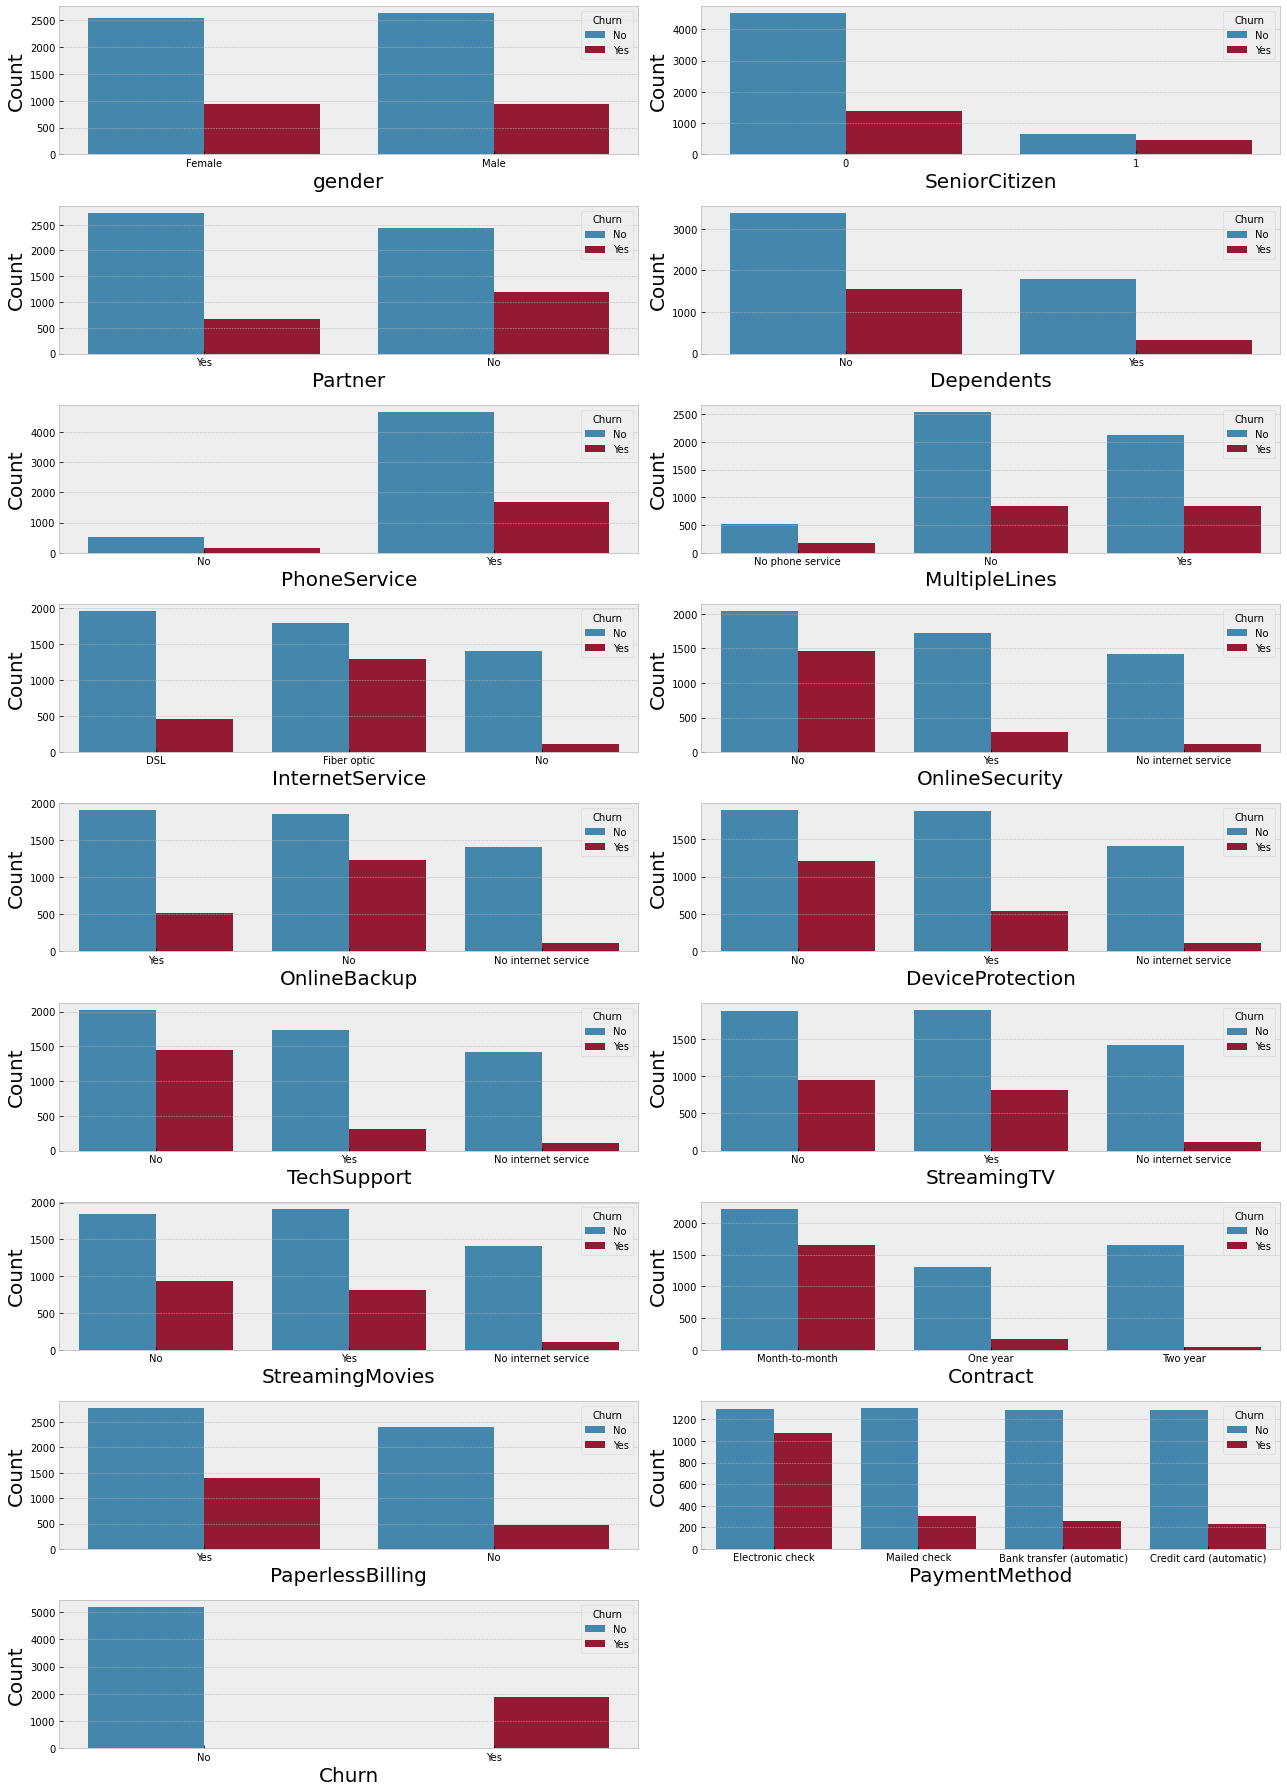

In [61]:
#'Churn' vs Categorical Data Columns
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = CCA['Churn']
X = CCA.drop(columns = ['tenure','MonthlyCharges','TotalCharges'])
for col in X:
    if plotnum<=23:
        plt.subplot(9,2,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

In [62]:
#Checking for Outliers in columns with continuous distribution
X = CCA.drop(columns = ['Churn'])
y = CCA['Churn']

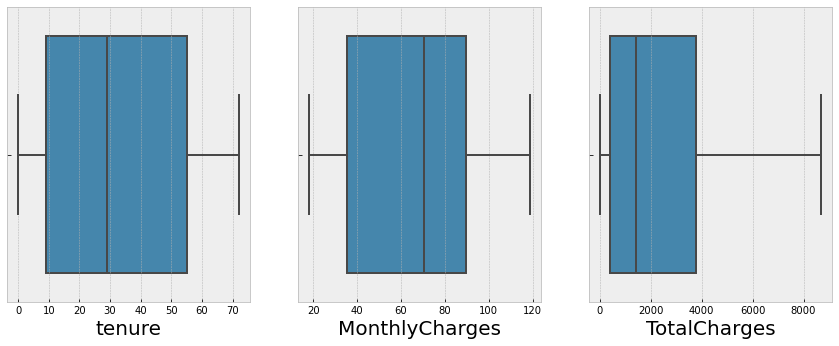

In [63]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [64]:
#Checking for Skewness in Data
X[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

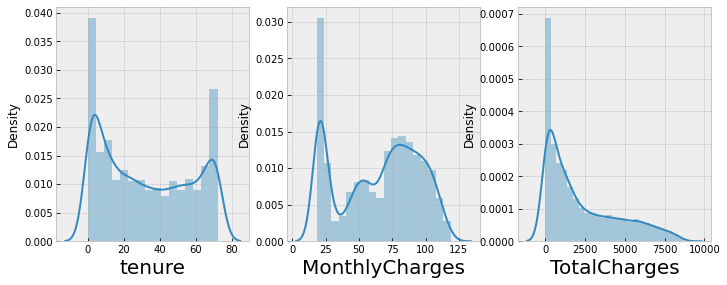

In [65]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [66]:
#Reducing skewness further using PowerTransformer
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['TotalCharges']]
transformed= powtrans.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe
transformed.skew()

TotalCharges   -0.144899
dtype: float64

In [67]:
transformed.index = CCA.index
CCA[['TotalCharges']]=transformed[['TotalCharges']]
CCA[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

In [68]:
#Encoding using OrdinalEncoder()
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for col in CCA.columns:
    if CCA[col].dtypes == 'object':
        CCA[col]=enc.fit_transform(CCA[col].values.reshape(-1,1))
CCA

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


In [69]:
#Finding Correlation
C_corr = CCA.corr()
C_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


Text(0.5, 1.0, 'Correlation matrix')

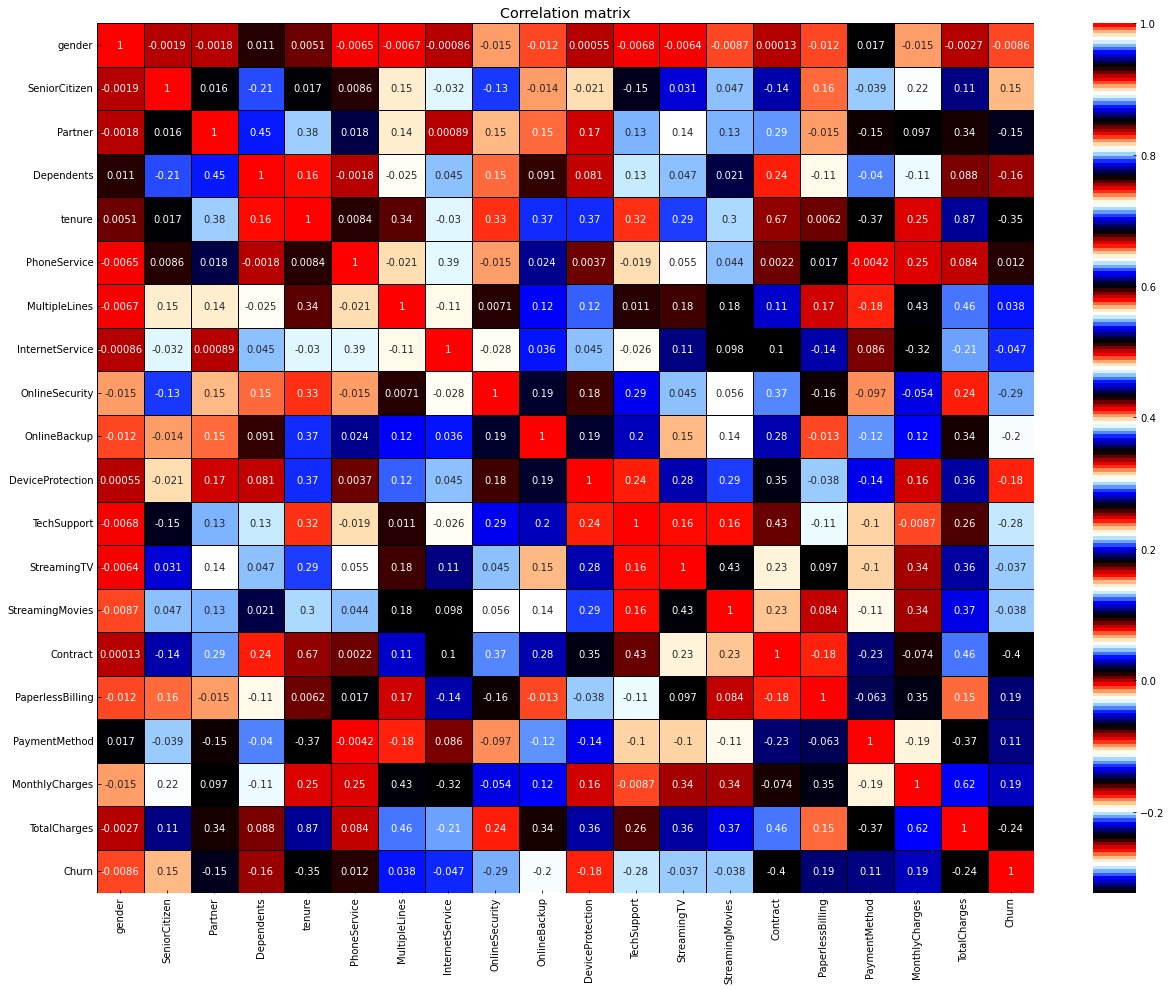

In [70]:
#Correalation using the Heatmap
plt.figure(figsize=(21,16))
sns.heatmap(CCA.corr(), annot =True, cmap='flag_r' , linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

In [75]:
#Feature Selection
X = CCA.drop(columns = ['Churn'])
y = CCA['Churn']
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [76]:
#Checking for Multicollinearity using Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif.head(20)

,Features,vif
0,gender,1.001684
1,SeniorCitizen,1.149730
2,Partner,1.463075
3,Dependents,1.384396
4,tenure,10.690306
5,PhoneService,1.622399
6,MultipleLines,1.397403
7,InternetService,1.866643
8,OnlineSecurity,1.252550
9,OnlineBackup,1.188767


In [77]:
# importing some base  models here,since  we  are using  Regressor  as  the label has  continous or numerical values 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [78]:
lr= LinearRegression()

In [79]:
#Choosing the best random state for our ML Model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
print(f"Best training accuracy is :{r2_score(y_train,pred_train)}, at random state : {i}")
print(f"Best test accuracy is :{r2_score(y_test,pred_test)}, at random state : {i}")

Best training accuracy is :0.2978492340181468, at random state : 99
Best test accuracy is :0.3022105237461694, at random state : 99


In [80]:
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=99, test_size=0.3)

In [81]:
#using Linear regression model
#taking Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Accuracy score of Linear Regression : ",r2_score(y_test,pred_test))

Accuracy score of Linear Regression :  0.3022105237461694


In [82]:
#Doing the Cross validation on the Linear Regression model
rain_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=6)
cv_mean1=cv_score.mean()

print("Cross Validation Score for Linear Regressor model: ",cv_mean1)

Cross Validation Score for Linear Regressor model:  0.29588026638314474


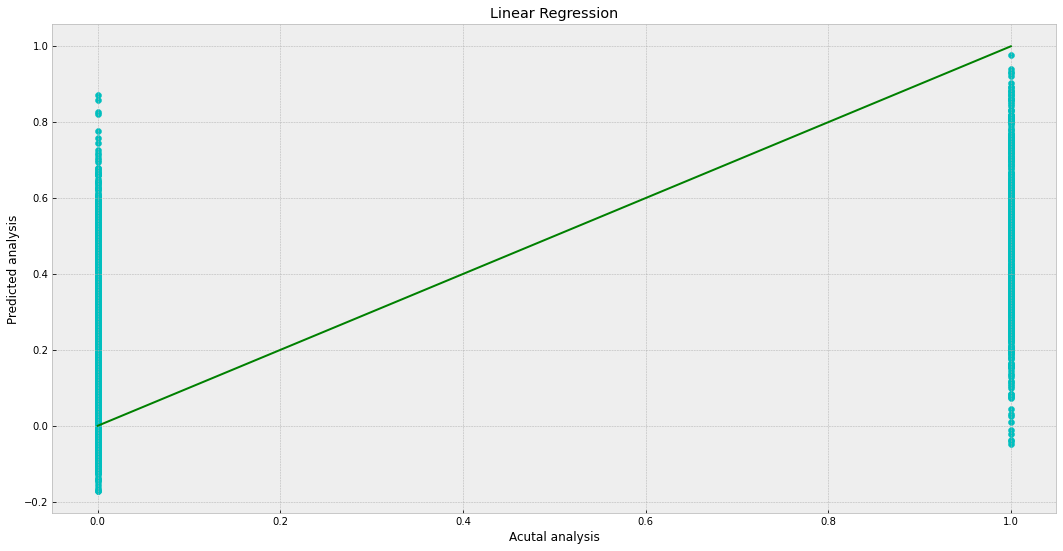

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(x=y_test,y=pred_test,color='c')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Acutal analysis")
plt.ylabel("Predicted analysis")
plt.title("Linear Regression")
plt.show()

In [84]:
#Random Forest Model
#Taking the randomforest regressor model
rfr=RandomForestRegressor(n_estimators =200, random_state=98,bootstrap=True,)
rfr.fit(x_train,y_train)
pred_test_rf=rfr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.3022105237461694


In [85]:
#Checking the cross validation of randomforest regressor to avaoid over fiiting 

cv_score=cross_val_score(rfr,x,y,cv=6)
cv_mean3=cv_score.mean()

print("Cross Validation Score for Random Forest Regressor model: ",cv_mean3)

Cross Validation Score for Random Forest Regressor model:  0.24863025169988318


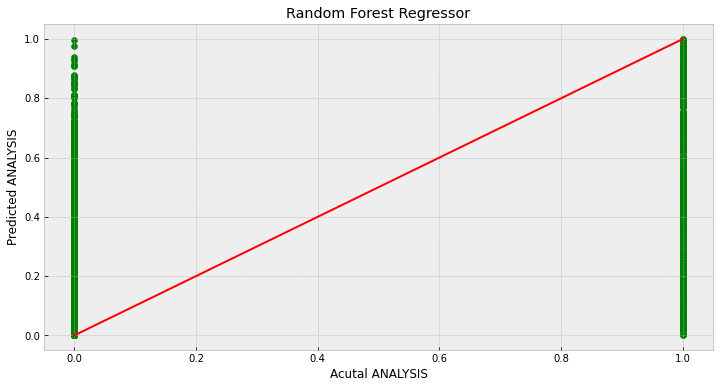

In [86]:
#Verifying the performance of the model by graph
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=pred_test_rf,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Acutal ANALYSIS")
plt.ylabel("Predicted ANALYSIS")
plt.title("Random Forest Regressor")
plt.show()

In [87]:
#Using the GradientBoosting Algorithm
#Taking the randomforest regressor model
Gbr =GradientBoostingRegressor(n_estimators =1000,learning_rate =0.1 ,random_state=110, max_depth=4, alpha=0.1,n_iter_no_change=5 )
Gbr.fit(x_train,y_train)
pred_test_Gbr=Gbr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.3022105237461694


In [88]:
#Checking the cross validation of Gradient boosting regressor to avaoid over fiiting 

cv_score=cross_val_score(Gbr,x,y,cv=7)
cv_mean3=cv_score.mean()

print("Cross Validation Score for Gradient boosting Regressor model: ",cv_mean3)

Cross Validation Score for Gradient boosting Regressor model:  0.30475169241988187


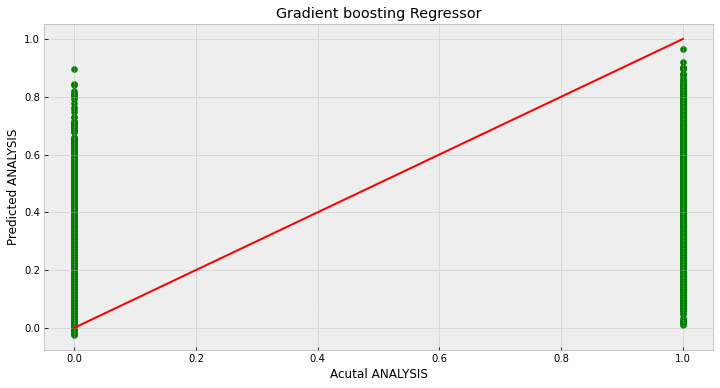

In [89]:
#Verifying the performance of the model by graph
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=pred_test_Gbr,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Acutal ANALYSIS")
plt.ylabel("Predicted ANALYSIS")
plt.title("Gradient boosting Regressor")
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


In [93]:
from sklearn.metrics import r2_score, mean_absolute_error

In [94]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))


R2_Score: 0.2080942530667953
Mean abs error: 0.27927643687227216
Mean squared error: 0.15442907807634107


In [96]:
from sklearn.model_selection import cross_val_score
#KNN regressor
cross_val_score(knn,x,y,cv=5).mean()

0.21397793350719843

Text(0.5, 1.0, 'K-nearest neighbors  regressor')

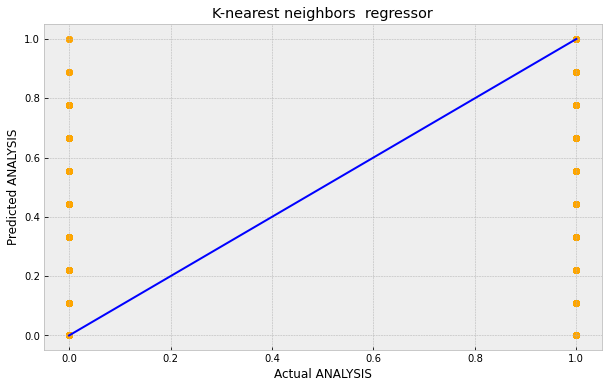

In [97]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual ANALYSIS")
plt.ylabel("Predicted ANALYSIS")
plt.title("K-nearest neighbors  regressor")

In [98]:
#Support Vector Regression Mode
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

R2_Score: 0.2106806040852649
Mean abs error: 0.26724320217139613
Mean squared error: 0.15392471527191537


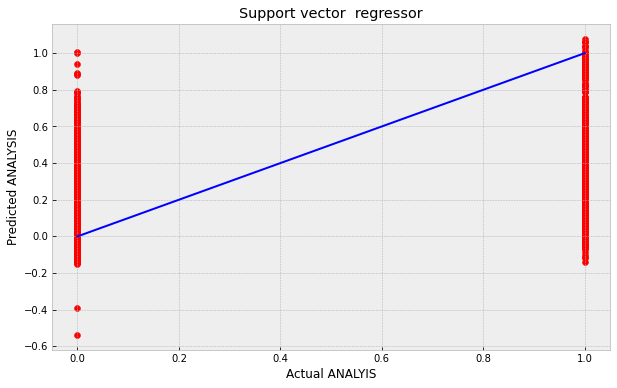

In [99]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predsv,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual ANALYIS")
plt.ylabel("Predicted ANALYSIS")
plt.title("Support vector  regressor")
plt.show()

In [106]:
#SVR Regression
cross_val_score(sv,x,y,cv=5).mean()

0.20659616423393273

In [107]:
#Grdient boosting Regressor
# Checking R2 score for svr
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=69, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

R2_Score: 0.2744071340659947
Mean abs error: 0.2719277256035255
Mean squared error: 0.14149744180908178


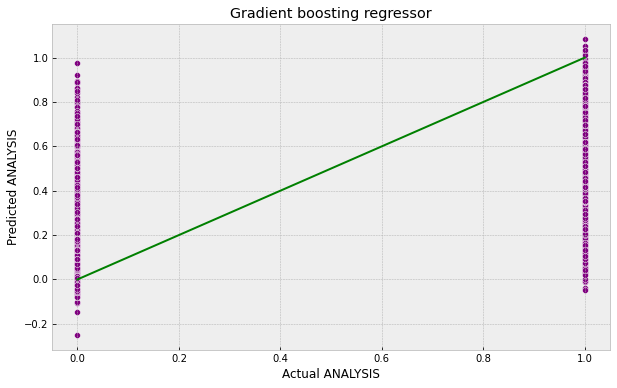

In [108]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=predGb,color='purple')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual ANALYSIS")
plt.ylabel("Predicted ANALYSIS")
plt.title("Gradient boosting regressor")
plt.show()

In [109]:
#Gradient Boosting Regressor
cross_val_score(Gb,x,y,cv=5).mean()

0.27677681637264573

In [16]:
import numpy as np

In [17]:
a = np.array(y_test)
predicted = np.array(Gbr.predict(x_test))
CCA = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
CCA

NameError: name 'y_test' is not defined